### AI in speech Processing
### BL.EN.U4AIE21128 - Lab 4

**A1. Use numpy.fft.fft() to transform the speech signal to its spectral domain. Please plot the
amplitude part of the spectral components and observe it.**

In [1]:
import librosa
import IPython.display as ipd

In [2]:
filename="Audio.wav"

Original Signal


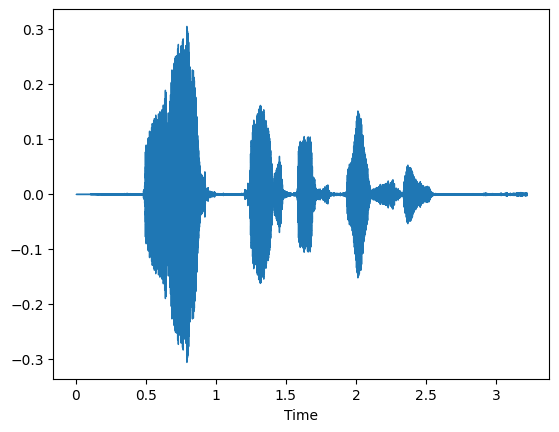

In [3]:
y, sr = librosa.load(filename)
print('Original Signal')
librosa.display.waveshow(y)


In [4]:
ipd.Audio(filename)

In [5]:
import numpy as np
import matplotlib.pyplot as plt
fft_s=np.fft.fft(y, n=None, axis=-1, norm=None)
print(fft_s)

[ 0.63851553+5.13478149e-15j  0.04392769-1.05778690e-01j
 -0.19598561-4.72799927e-02j ... -0.14655096-3.08949967e-02j
 -0.19598561+4.72799927e-02j  0.04392769+1.05778690e-01j]


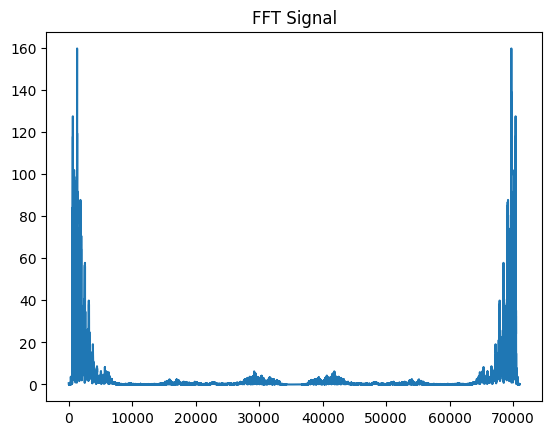

In [6]:
amp=np.abs(fft_s)
plt.plot(amp)
plt.title('FFT Signal')
plt.show()

**A2. Use numpy.fft.ifft() to inverse transform the frequency spectrum of the speech signal
from frequency domain to time domain. Compare the generated time domain signal with the
original signal.**

In [7]:
ifft_s=np.fft.ifft(fft_s, n=None, axis=-1, norm=None)
print(ifft_s)

[ 6.93889390e-18-4.68375339e-17j  2.77538877e-17+3.81651440e-17j
 -8.68159656e-18+4.51012752e-17j ... -1.16225821e-03+1.45395323e-17j
 -1.54696254e-03+1.72976833e-17j  6.93950769e-18-1.38774809e-17j]


/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


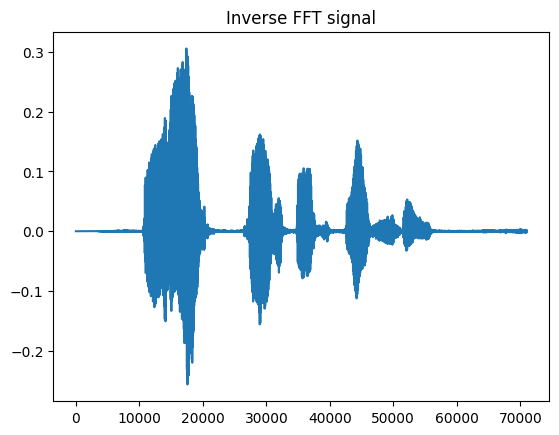

In [8]:
plt.plot(ifft_s)
plt.title('Inverse FFT signal')
plt.show()

**A3. Perform the spectral analysis of a word present in the recorded speech. Compare the spectrum
with the spectrum of the full signal.**

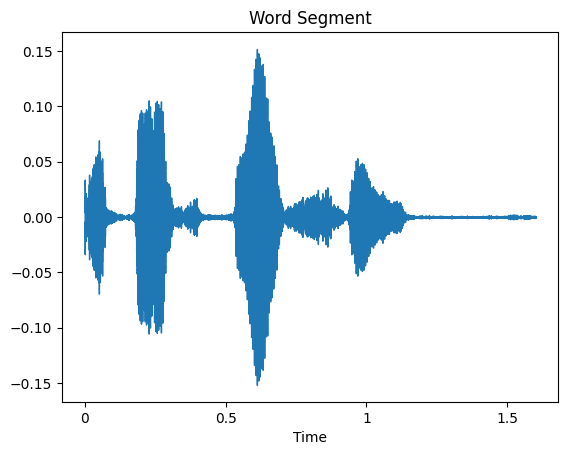

In [9]:
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt

# Load the audio file
filename = "Audio.wav"
y, sr = librosa.load(filename)

# Define the word segment you want to analyze
start_time = 1.4  # Replace with the start time of the word in seconds
end_time = 3    # Replace with the end time of the word in seconds

# Extract the word segment
word_segment = y[int(start_time * sr):int(end_time * sr)]

librosa.display.waveshow(word_segment, sr=sr)
plt.title('Word Segment')

# Play the audio of the word segment
ipd.Audio(word_segment, rate=sr)


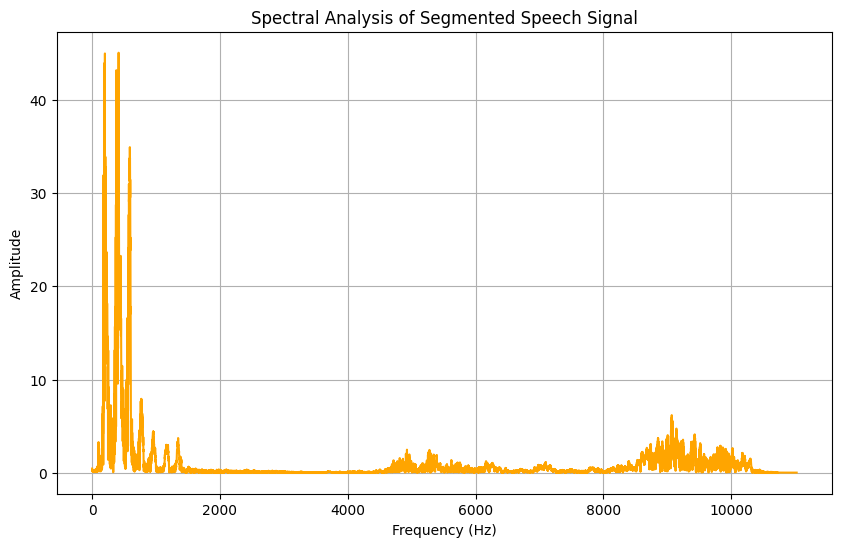

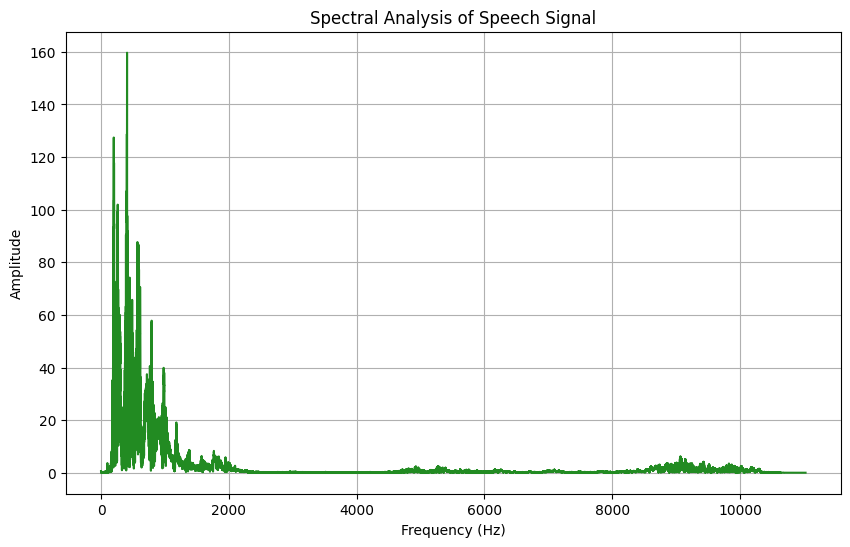

In [10]:
fft_output_seg = np.fft.fft(word_segment)
seg_freq = np.fft.fftfreq(len(word_segment), 1/sr)
plt.figure(figsize=(10, 6))
plt.plot(seg_freq[:len(seg_freq)//2], np.abs(fft_output_seg)[:len(seg_freq)//2],color='orange')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Spectral Analysis of Segmented Speech Signal')
plt.grid(True)
plt.show()
fft_output = np.fft.fft(y)
f_freq = np.fft.fftfreq(len(y), 1/sr)
plt.figure(figsize=(10, 6))
plt.plot(f_freq[:len(f_freq)//2], np.abs(fft_output)[:len(f_freq)//2],color='forestgreen')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Spectral Analysis of Speech Signal')
plt.grid(True)
plt.show()

**A4. Take a rectangular window of 20 mili-second sampled at 22.5 KHz. Using FFT, analyse the
spectral components.**

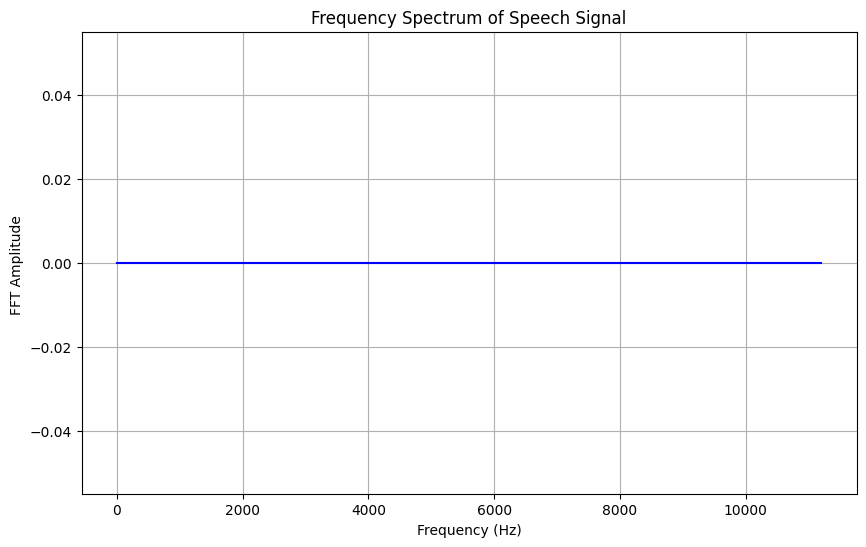

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft
sr4=22500
window_duration = 0.02
window_samples = int(window_duration * sr4)
windowed_signal = y[:window_samples]

# Compute the FFT
X = fft(windowed_signal)

# Get the one-sided spectrum
n_oneside = window_samples // 2
frequencies = np.arange(n_oneside) * (sr4 / window_samples)
spectrum = np.abs(X[:n_oneside])

# Plot the frequency spectrum
plt.figure(figsize=(10, 6))
plt.plot(frequencies, spectrum, 'b')
plt.xlabel('Frequency (Hz)')
plt.ylabel('FFT Amplitude ')
plt.title('Frequency Spectrum of Speech Signal')
plt.grid(True)
plt.show()

**A5. Break your speech signal into window lengths of 20 mSec intervals. Evaluate the frequency components using numpy.fft.rfft(). Stack these frequency components as columns in a matrix. Use heatmap plot to display the matrix. You may use librosa.stft() or
scipy.signal.stft() as well to achieve this.**

In [12]:
# Window length in sample of 20 ms
window_length = int(0.02 * sr)
hop_length = window_length // 2
#  STFT
stft = librosa.stft(y, n_fft=window_length, hop_length=hop_length)
print(stft)
amp_stft= np.abs(stft)

# Stack frequency components as columns in a matrix
frequency_matrix = np.transpose(amp_stft)
print(frequency_matrix)

[[ 0.0000000e+00+0.0000000e+00j  0.0000000e+00+0.0000000e+00j
   0.0000000e+00+0.0000000e+00j ...  2.7522452e-03+0.0000000e+00j
   3.1323838e-03+0.0000000e+00j  2.5919594e-03+0.0000000e+00j]
 [ 0.0000000e+00+0.0000000e+00j  0.0000000e+00+0.0000000e+00j
   0.0000000e+00+0.0000000e+00j ...  1.1283824e-03+2.3253558e-03j
  -1.7200313e-03+5.2086315e-03j  4.0869694e-03+2.1831605e-03j]
 [ 0.0000000e+00+0.0000000e+00j  0.0000000e+00+0.0000000e+00j
   0.0000000e+00+0.0000000e+00j ... -2.1272615e-02-1.2326916e-02j
   2.1944718e-02-5.0051538e-03j -1.4773776e-02-1.1968779e-03j]
 ...
 [ 0.0000000e+00+0.0000000e+00j  0.0000000e+00+0.0000000e+00j
   0.0000000e+00+0.0000000e+00j ... -2.3596591e-08+4.9975426e-07j
   5.8834647e-08+2.9744749e-07j -2.4588939e-05+4.8298360e-05j]
 [ 0.0000000e+00+0.0000000e+00j  0.0000000e+00+0.0000000e+00j
   0.0000000e+00+0.0000000e+00j ... -6.1804776e-08-6.4319522e-08j
  -2.5987313e-07-1.9224025e-07j -4.3157612e-05+3.3416418e-05j]
 [ 0.0000000e+00+0.0000000e+00j  0.00000

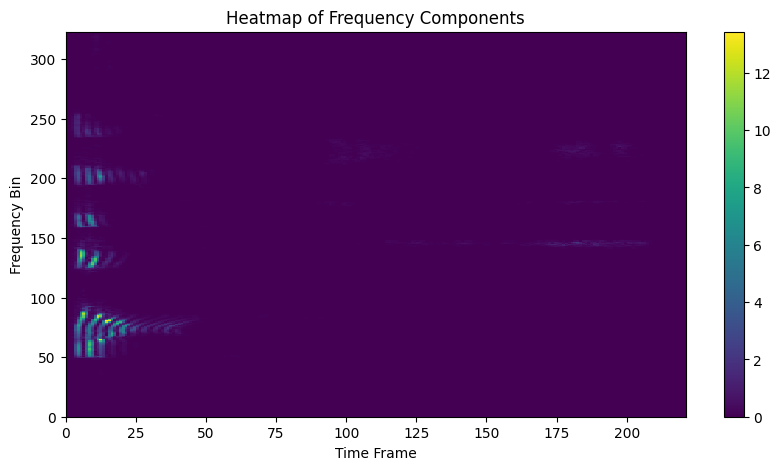

In [13]:
# Create a heatmap plot
plt.figure(figsize=(10, 5))
plt.pcolormesh(frequency_matrix, vmin=0, vmax=np.max(amp_stft))
plt.xlabel("Time Frame")
plt.ylabel("Frequency Bin")
plt.title("Heatmap of Frequency Components")
plt.colorbar()
plt.show()

**A6. Use scipy.signal.spectrogram() to plot the spectrogram of the speech signal at the
same duration. Compare the plots.**

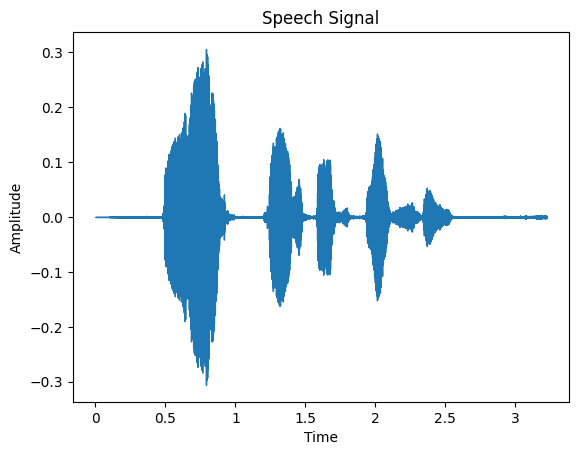

<ipython-input-14-b201d0554c0f>:10: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(t, f, 10 * np.log10(Sxx))


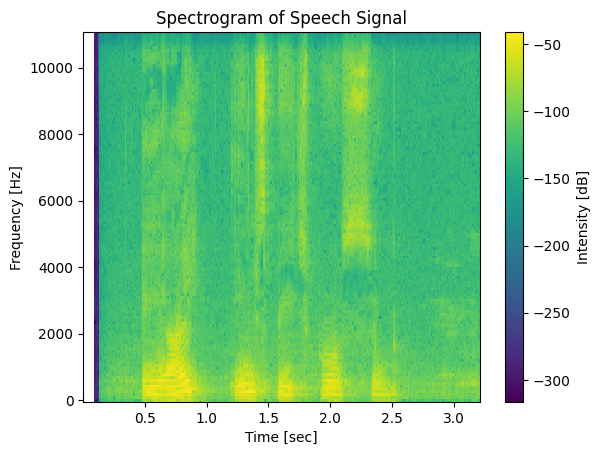

In [14]:
from scipy.signal import spectrogram

librosa.display.waveshow(y)
plt.title('Speech Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

f, t, Sxx = spectrogram(y, sr)
plt.pcolormesh(t, f, 10 * np.log10(Sxx))
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title('Spectrogram of Speech Signal')
plt.colorbar(label='Intensity [dB]')
plt.show()